# Part 1: Obtaining Time Series Data


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Download Economic Time Series Data

In [3]:
import pandas as pd

tickers = list(pd.read_csv('./data/SP100_LIST.csv', sep=';')['Symbol'])
provider = 'yahoo'
start = '2010-01-01'
end = '2017-11-14'

data = pd.read_csv('./data/data_sp100.csv', sep=';', index_col=0, header=0, parse_dates=True)
data.head()

,AAPL,ABBV,ABT,ACN,AGN,AIG,ALL,AMGN,AMZN,AXP,...,UNP,UPS,USB,UTX,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,26.986492,NaN,21.011253,34.577480,38.728325,23.313679,25.275532,49.492962,134.520004,35.931217,...,27.156313,45.483036,19.122402,57.742420,18.287632,21.048664,31.049047,22.251017,43.785145,53.863396
2010-01-04,27.406532,NaN,21.194162,35.052402,39.393185,23.243692,25.586843,50.499107,133.899994,36.285904,...,27.789530,46.125214,19.436718,59.589233,18.429817,21.143955,31.539467,22.523083,44.424107,54.621700
2010-01-05,27.453915,NaN,21.022924,35.269032,39.002094,22.808218,26.007540,50.061653,134.690002,36.206097,...,28.176256,46.204498,19.929434,58.699112,18.218628,21.182079,31.285799,23.141388,43.981754,54.834965
2010-01-06,27.017223,NaN,21.139675,35.643974,39.129196,22.660460,26.015955,49.685444,132.250000,36.791367,...,28.218761,45.863583,20.141808,58.391304,17.973986,20.573015,31.049047,23.174374,43.883450,55.308914
2010-01-07,26.967278,NaN,21.314800,35.610645,38.816319,22.224985,26.150579,49.230499,130.000000,37.388069,...,27.968023,45.514767,20.532579,58.640884,18.141272,20.450558,31.235058,24.015276,43.908028,55.135132


In [20]:
companies = ['AAPL', 'MSFT', 'JNJ', 'MCD', 'GOOGL', 'DIS', 'V', 'PG']

 
# calculate returns
returns = data[companies] / data[companies].shift(1) - 1
returns = returns.fillna(method='ffill').dropna()
returns.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15576\3915715918.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  returns = returns.fillna(method='ffill').dropna()


,AAPL,MSFT,JNJ,MCD,GOOGL,DIS,V,PG
Date,,,,,,,,
2010-01-04,0.015565,0.015420,0.004192,0.005445,0.010920,-0.005582,0.007775,0.008082
2010-01-05,0.001729,0.000323,-0.011595,-0.007645,-0.004404,-0.002494,-0.011459,0.000327
2010-01-06,-0.015906,-0.006137,0.008133,-0.013644,-0.025209,-0.005314,-0.013428,-0.004743
2010-01-07,-0.001849,-0.010400,-0.007137,0.007323,-0.023280,0.000314,0.009307,-0.005423
2010-01-08,0.006648,0.006897,0.003438,-0.000969,0.013331,0.001571,0.002766,-0.001322


Analyse de la corrélation des actions

In [21]:
cov = np.matrix(np.cov(returns.T))
std_devs = np.sqrt(np.diag(cov))
corr_matrix = np.divide(cov, std_devs[:, None] * std_devs[None, :])  # Équivalent à corr = cov / (σ_i * σ_j)

# Transformation en DataFrame pour traitement avec les noms
corr_df = pd.DataFrame(np.array(corr_matrix), index=companies, columns=companies)

# Extraction des paires (hors diagonale)
corr_pairs = corr_df.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
corr_pairs = corr_pairs.drop_duplicates().sort_values()

# Affichage
print("\n🔻 Paires les moins corrélées :")
print(corr_pairs.head(5))

print("\n🔺 Paires les plus corrélées :")
print(corr_pairs.tail(10))



🔻 Paires les moins corrélées :
AAPL   PG     0.272433
       JNJ    0.297312
       MCD    0.315332
GOOGL  PG     0.323445
AAPL   V      0.338730
dtype: float64

🔺 Paires les plus corrélées :
AAPL   GOOGL    0.415621
DIS    PG       0.419153
JNJ    V        0.425856
GOOGL  V        0.429191
MSFT   DIS      0.445101
JNJ    MCD      0.446723
DIS    V        0.447478
JNJ    DIS      0.466712
MSFT   GOOGL    0.472875
JNJ    PG       0.511578
dtype: float64


Analyse des actions avec le plus grand rendement

In [22]:
for i in companies:
    print(f'{i} mean return: {returns[i].mean()*100:.2f}%')

AAPL mean return: 0.11%
MSFT mean return: 0.07%
JNJ mean return: 0.06%
MCD mean return: 0.07%
GOOGL mean return: 0.07%
DIS mean return: 0.07%
V mean return: 0.10%
PG mean return: 0.04%


# Part 2: Théorie du portefeuille optimal 


# Construire tous les portefeuilles possibles

In [23]:
def create_random_weights(n_assets):
    '''
    returns randomly choosen portfolio weights that sum to one
    '''
    w = np.random.rand(n_assets)
    return w / w.sum()
 
def evaluate_random_portfolio(returns):
    ''' 
    returns the mean and standard deviation of returns for a random portfolio
    '''
    # in case a resampler is used
    returns = pd.DataFrame(returns)   
    
    # calculate from covariance, asset returns and weights
    cov = np.matrix(returns.cov())
    R = np.matrix(returns.mean())
    w = np.matrix(create_random_weights(returns.shape[1]))
    
    # calculate expected portfolio return and risk
    mu = w * R.T
    sigma = np.sqrt(w * cov * w.T)
    
    return mu, sigma
 
def create_random_portfolios(returns, n_portfolios=1500):
    '''
    plots randomly created portfolios
    '''
    # calculate mean and std for every portfolio
    pf_mus, pf_sigmas = np.column_stack([evaluate_random_portfolio(returns) for _ in range(n_portfolios)])
 
    return pf_mus, pf_sigmas

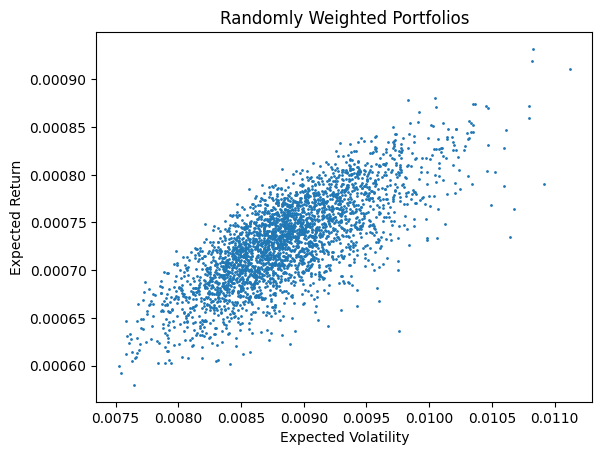

In [ ]:
pf_mus, pf_sigmas = create_random_portfolios(returns, n_portfolios=3000)
 
# scatter plot for expected return and volatility
plt.plot(pf_sigmas, pf_mus, 'o', markersize=1)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Randomly Weighted Portfolios')
plt.show()

#Ce code va générer 3 000 portefeuilles aléatoires composés des actions et calculer pour chacun leur rendement et volatilité



# Part 3: Frontière efficiente

# Avec optimisation quadratique

In [25]:
!pip install cvxopt

In [70]:
import cvxopt as opt
from cvxopt import solvers
 
def calculate_frontier(returns):
    '''
    returns optimal portfolio weights and corresponding sigmas for a desired optimal portfolio return
    Params:
    - returns: T x N matrix of observed data
    '''
    returns = pd.DataFrame(returns)
    cov = np.matrix(np.cov(returns.T))
    N = returns.shape[1]
    pbar = np.matrix(returns.mean())
    
    # define list of optimal / desired mus for which we'd like to find the optimal sigmas
    
    optimal_mus = []
    r_min = pbar.mean()    # minimum expected return
    for i in range(50):
        optimal_mus.append(r_min)
        r_min += (pbar.mean() / 100)
    
    optimal_mus = np.linspace(pbar.min(), pbar.max(), 50).tolist()

    # constraint matrices for quadratic programming
    P = opt.matrix(cov)
    q = opt.matrix(np.zeros((N, 1)))
    G = opt.matrix(np.concatenate((-np.array(pbar), -np.identity(N)), 0))
    A = opt.matrix(1.0, (1,N))
    b = opt.matrix(1.0)
    
    # hide optimization
    opt.solvers.options['show_progress'] = False
    
    # calculate portfolio weights, every weight vector is of size Nx1
    # find optimal weights with qp(P, q, G, h, A, b)
    optimal_weights = []
    for mu in optimal_mus:
        try:
            h = opt.matrix(np.concatenate((-np.ones((1, 1)) * mu, np.zeros((N, 1))), 0))
            sol = solvers.qp(P, q, G, h, A, b)
            optimal_weights.append(sol['x'])
        except ValueError:
            print(f" Erreur pour mu = {mu}")
            optimal_weights.append(None)

    
    # find optimal sigma
    # \sigma = w^T * Cov * w
    optimal_sigmas = []
    for w in optimal_weights:
        if w is None:
            optimal_sigmas.append(None)
        else:
            sigma = np.sqrt(np.matrix(w).T * cov.T.dot(np.matrix(w)))[0, 0]
            optimal_sigmas.append(sigma)
    return optimal_weights, optimal_mus, optimal_sigmas


# Calculs des poids

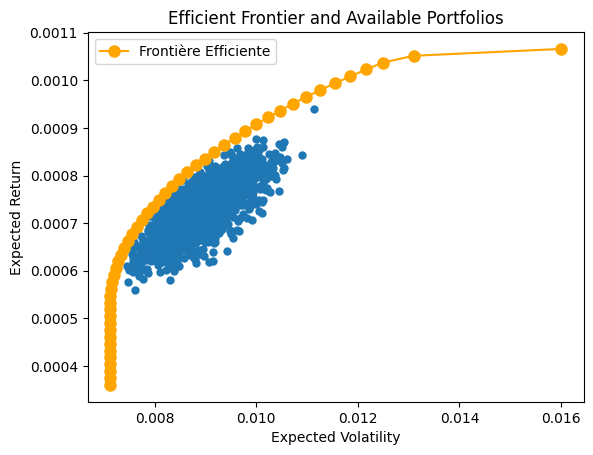

0.0010660797284123668


In [ ]:
optimal_weights, optimal_mus, optimal_sigmas = calculate_frontier(returns)
# Filtrage des valeurs valides
valid_results = [
    (w, mu, sigma)
    for w, mu, sigma in zip(optimal_weights, optimal_mus, optimal_sigmas)
    if w is not None and sigma is not None
]

# Écriture dans le fichier
with open("optimal_weights.txt", "w") as f:
    for j, (w, mu, sigma) in enumerate(valid_results):
        weights_percent = np.round(np.array(w).flatten() * 100, 2)
        f.write("--------------------------------------------------\n")
        f.write(f"Portfolio {j+1} (Target return: {mu:.4f}):\n")
        for i, weight in enumerate(weights_percent):
            f.write(f"{companies[i]} : {weight:.2f} %\n")

# Tracer la frontière efficace et les portefeuilles aléatoires
pf_mus, pf_sigmas = create_random_portfolios(returns, n_portfolios=3000)

# On extrait les listes nettoyées
valid_mus = [mu for _, mu, _ in valid_results]
valid_sigmas = [sigma for _, _, sigma in valid_results]

plt.plot(pf_sigmas, pf_mus, 'o', markersize=5)
plt.plot(valid_sigmas, valid_mus, 'o-', color='orange', markersize=8, label='Frontière Efficiente')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier and Available Portfolios')
plt.legend(loc='best')
plt.show()



# The End.